<a href="https://colab.research.google.com/github/DCI-alxogm/ml2023-Diego1733/blob/main/Oct20-21/Oct20_21.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Parte 1

In [54]:
import numpy as np
from astropy.io import fits
from astropy.table import Table
import matplotlib.pyplot as plt

In [55]:
#The spectra files we will be using had been preprocessed so that they only include quasars with redshift above 2.1
#For more publicily available spectra of all different targets that DESI observe consult https://data.desi.lbl.gov/doc/
#Lets read open one spectra file.
spec_file=fits.open("/content/drive/MyDrive/ML2023/coadd-sv3-dark-25956.fits")

In [56]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [57]:
#Display the contect of the file, organized in different HDUs. each HDU can be of a different type.
spec_file.info()

Filename: /content/drive/MyDrive/ML2023/coadd-sv3-dark-25956.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      60   ()      
  1  FIBERMAP      1 BinTableHDU    219   49R x 70C   [K, J, D, D, E, E, E, K, B, 3A, D, J, I, 8A, J, J, 4A, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, I, E, E, E, E, K, 2A, E, E, E, E, 1A, K, K, K, K, K, K, K, K, K, D, D, I, E, I, I, E, E, E, E, D, E, D, E, E]   
  2  EXP_FIBERMAP    1 BinTableHDU     64   6847R x 26C   [K, J, D, J, J, D, J, D, I, J, K, J, J, E, E, E, D, D, K, D, D, D, D, D, D, D]   
  3  B_WAVELENGTH    1 ImageHDU        10   (2751,)   float64   
  4  B_FLUX        1 ImageHDU         8   (2751, 49)   float32   
  5  B_IVAR        1 ImageHDU         8   (2751, 49)   float32   
  6  B_MASK        1 ImageHDU        10   (2751, 49)   int32 (rescales to uint32)   
  7  B_RESOLUTION    1 ImageHDU         9   (2751, 11, 49)   float32   
  8  R_WAVELENGTH    1 ImageHDU        10   (2326,)   

In [58]:
#The FIBERMAP HDU contains information about the object that was observed,
# in particular we will be interested in the TARGETID, the unique identifier
# assigned to each object observed in DESI

fibermap=Table(spec_file["FIBERMAP"].data)
fibermap

TARGETID,COADD_FIBERSTATUS,TARGET_RA,TARGET_DEC,PMRA,PMDEC,REF_EPOCH,FA_TARGET,FA_TYPE,OBJTYPE,SUBPRIORITY,OBSCONDITIONS,RELEASE,BRICKNAME,BRICKID,BRICK_OBJID,MORPHTYPE,EBV,FLUX_G,FLUX_R,FLUX_Z,FLUX_W1,FLUX_W2,FLUX_IVAR_G,FLUX_IVAR_R,FLUX_IVAR_Z,FLUX_IVAR_W1,FLUX_IVAR_W2,FIBERFLUX_G,FIBERFLUX_R,FIBERFLUX_Z,FIBERTOTFLUX_G,FIBERTOTFLUX_R,FIBERTOTFLUX_Z,MASKBITS,SERSIC,SHAPE_R,SHAPE_E1,SHAPE_E2,REF_ID,REF_CAT,GAIA_PHOT_G_MEAN_MAG,GAIA_PHOT_BP_MEAN_MAG,GAIA_PHOT_RP_MEAN_MAG,PARALLAX,PHOTSYS,PRIORITY_INIT,NUMOBS_INIT,SV3_DESI_TARGET,SV3_BGS_TARGET,SV3_MWS_TARGET,SV3_SCND_TARGET,DESI_TARGET,BGS_TARGET,MWS_TARGET,PLATE_RA,PLATE_DEC,COADD_NUMEXP,COADD_EXPTIME,COADD_NUMNIGHT,COADD_NUMTILE,MEAN_DELTA_X,RMS_DELTA_X,MEAN_DELTA_Y,RMS_DELTA_Y,MEAN_FIBER_RA,STD_FIBER_RA,MEAN_FIBER_DEC,STD_FIBER_DEC,MEAN_PSF_TO_FIBER_SPECFLUX
int64,int32,float64,float64,float32,float32,float32,int64,uint8,str3,float64,int32,int16,str8,int32,int32,str4,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,float32,float32,float32,float32,int64,str2,float32,float32,float32,float32,str1,int64,int64,int64,int64,int64,int64,int64,int64,int64,float64,float64,int16,float32,int16,int16,float32,float32,float32,float32,float64,float32,float64,float32,float32
39627776315097634,0,218.52424978650916,-0.5708880487743447,0.0,0.0,2015.5,262148,1,TGT,0.6786714935367465,1,9010,2186m005,328362,546,PSF,0.038301565,2.1088462,2.6753373,3.0280137,6.1234255,8.722145,638.51776,192.55594,83.18806,2.96911,0.6273142,1.6395667,2.079997,2.3541927,1.6395754,2.0800092,2.3542047,0,0.0,0.0,0.0,0.0,0,,0.0,0.0,0.0,0.0,S,103400,4,262148,0,0,0,0,0,0,218.52424978650916,-0.5708880487743447,7,5968.394,4,4,-0.0035714286,0.0043915506,-0.0028571428,0.005732115,218.5242362522236,0.03474935,-0.570876468972911,0.07156216,0.789
39627770271109740,0,218.44895797439506,-0.719380644742242,0.0,0.0,2015.5,262148,1,TGT,0.8617445200003712,1,9010,2183m007,326921,4716,PSF,0.038511276,1.8675007,2.2263274,1.7445359,4.1686535,5.4304776,1080.8403,643.4569,74.2835,3.3928757,0.7213921,1.4534671,1.7327403,1.3577642,1.4534671,1.7327403,1.3577642,0,0.0,0.0,0.0,0.0,0,,0.0,0.0,0.0,0.0,S,103400,4,262148,0,0,0,0,0,0,218.44895797439506,-0.719380644742242,7,6376.1396,5,5,-0.005,0.0077551827,-0.003,0.0067717903,218.4489392177955,0.07953809,-0.7193684246118572,0.08681177,0.789
39627770271109663,0,218.44489778234856,-0.6503627954768026,0.0,0.0,2015.5,262148,1,TGT,0.6862554823098777,1,9010,2183m007,326921,4639,PSF,0.03767091,0.9389951,1.5217457,2.1123633,4.973551,7.649223,1709.9951,657.91705,129.35243,3.182526,0.6444316,0.73003054,1.1830955,1.6422768,0.7300333,1.1831069,1.6423012,0,0.0,0.0,0.0,0.0,0,,0.0,0.0,0.0,0.0,S,103400,4,262148,0,0,0,0,0,0,218.44489778234856,-0.6503627954768026,2,1641.9678,1,1,-0.007,0.007,0.003,0.003,218.4448717597359,0.0,-0.650374501195604,0.0,0.789
39627770271107659,0,218.3599421015996,-0.7847012179461395,0.0,0.0,2015.5,1179714,1,TGT,0.7512892596631447,1,9010,2183m007,326921,2635,REX,0.044287086,0.340597,0.39200372,0.51483154,3.026456,5.6512446,640.03625,299.1042,63.7238,3.2205527,0.67119694,0.2123443,0.24439368,0.32097036,0.21235447,0.24442847,0.32104084,0,1.0,0.33836335,0.0,0.0,0,,0.0,0.0,0.0,0.0,S,103100,9,1179714,0,0,0,0,0,0,218.3599421015996,-0.7847012179461395,3,2093.9639,1,1,0.001,0.001,-0.004,0.004,218.3599457913388,0.0,-0.7846852779973815,3.996803e-13,0.77981704
39627770271108753,0,218.4061716317348,-0.6684951821184881,0.0,0.0,2015.5,1179714,1,TGT,0.6726693674048274,1,9010,2183m007,326921,3729,REX,0.038801994,1.3429354,1.497762,2.075864,14.70572,18.051325,1067.2585,443.66803,67.02692,2.9109225,0.6239691,0.90932155,1.0141568,1.4055984,0.90932155,1.0141568,1.4055984,0,1.0,0.26051852,0.0,0.0,0,,0.0,0.0,0.0,0.0,S,103100,9,1179714,0,0,0,0,0,0,218.4061716317348,-0.6684951821184881,3,2093.9639,1,1,-0.003,0.003,-0.005,0.005,218.40616018510846,0.0,-0.6684750931668034,3.996803e-13,0.7834136
39627764227118638,0,218.2220149915

In [59]:
#As can be seen in the table, we have spectra of 49 quasars.

In [60]:
#Lets save the TARGETIDs into one variable for future use
tids=fibermap["TARGETID"]

In [61]:
#Now, the spectra DESI observed for each quasar, i.e. for a given targetid,
#is saved in HDUs named  B_FLUX, R_FLUX, Z_FLUX.
#And the Wavelenght grids are in B_WAVELENGTH,B_WAVELENGTH,Z_WAVELENGTH HDUs respectively.
# B,R,Z correspond to the different bands of the DESI spectrographs.
# Lets access to the spectra, only b band for now,  and plot it.
bwave = spec_file["B_WAVELENGTH"].data
bflux = spec_file["B_FLUX"].data

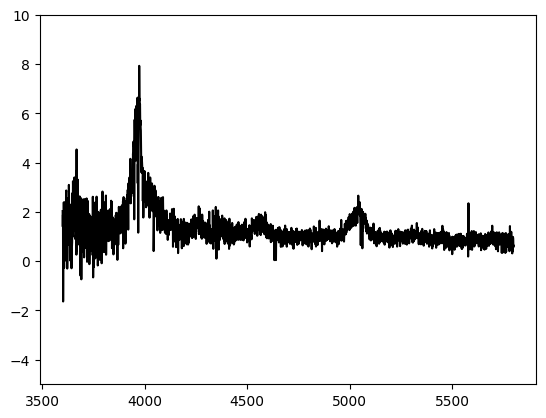

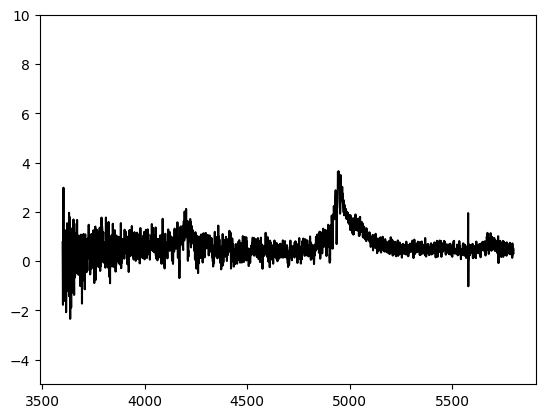

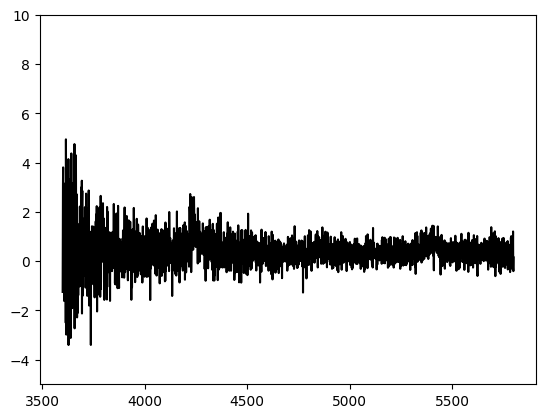

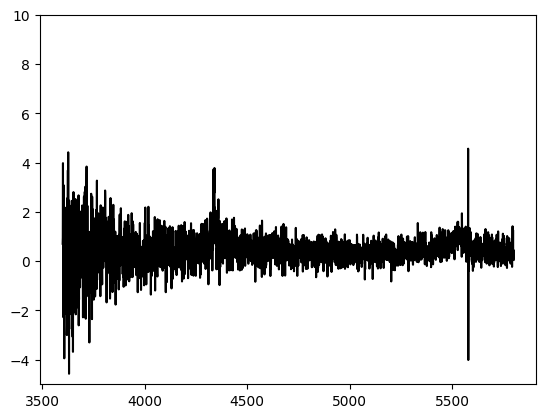

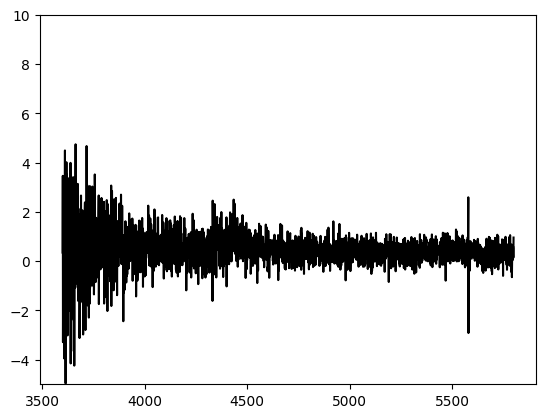

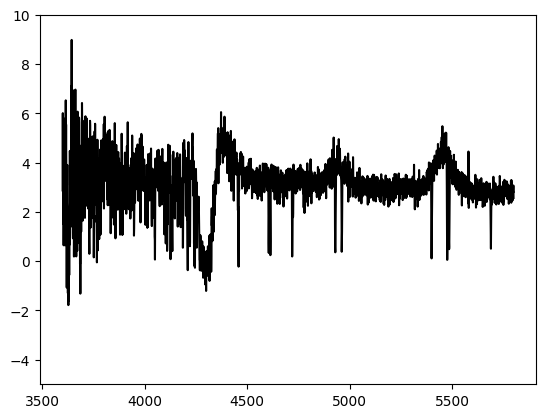

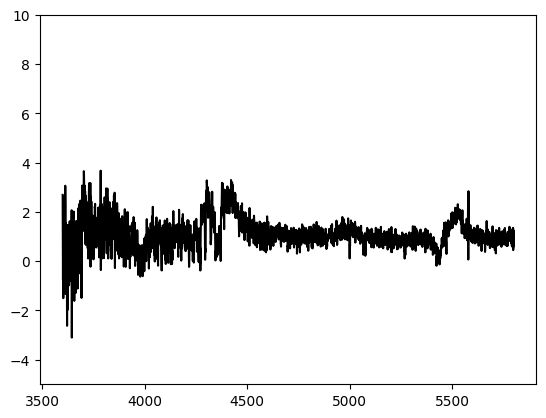

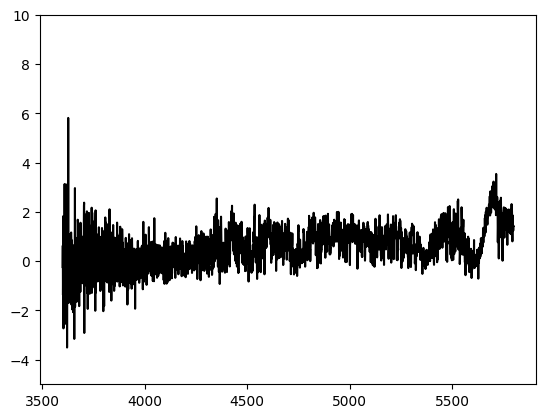

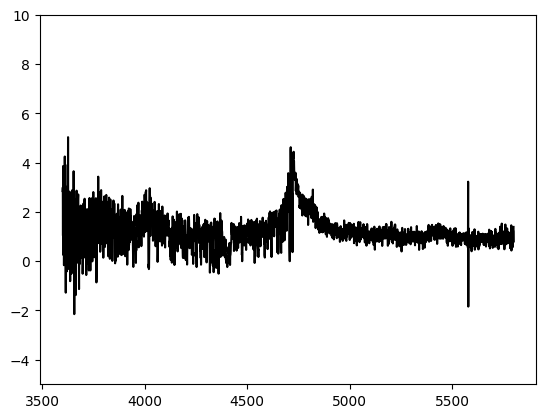

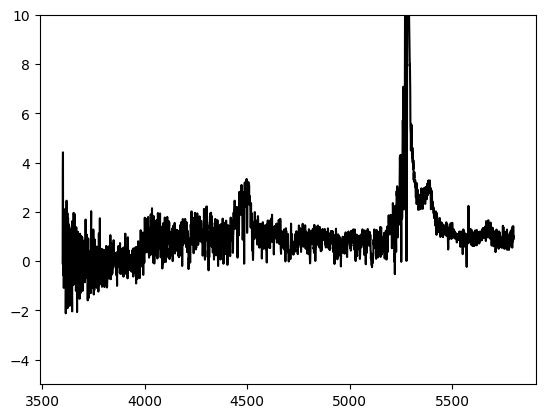

In [62]:
#Lets plot the first 10 spectra
for i in range(10):
  plt.plot(bwave,bflux[i],'k')
  plt.ylim(-5,10)
  plt.show()

NOTAS:

Mostrar información sobre el archivo FITS:

La función spec_file.info() se llama para mostrar información sobre la estructura del archivo FITS, incluyendo las Unidades de Datos del Encabezado (HDU).
Extraer datos de FIBERMAP:

El HDU "FIBERMAP" contiene información sobre los objetos observados, con un enfoque en el campo TARGETID, que es un identificador único para cada objeto.
El código utiliza spec_file["FIBERMAP"].data para extraer los datos de este HDU y los almacena en la variable fibermap, representada como una tabla de Astropy.
Graficar los espectros de los primeros 10 cuásares en la banda "B":

Luego, el código procede a extraer los datos de longitud de onda y flujo para la banda "B" de los HDUs B_WAVELENGTH y B_FLUX, respectivamente.
Se utiliza un bucle for para recorrer los primeros 10 cuásares y graficar sus espectros usando plt.plot. El eje x es la longitud de onda (bwave), y el eje y es el flujo (bflux).
plt.ylim se utiliza para establecer los límites del eje y en un rango específico.
plt.show() se llama dentro del bucle para mostrar cada gráfico.

## Exercise: Use the PCA analysis to find the principal components that corresponds for the spectra we have. Do it first for the spectra in only one file, then combine the data from different files and make the PCA again.

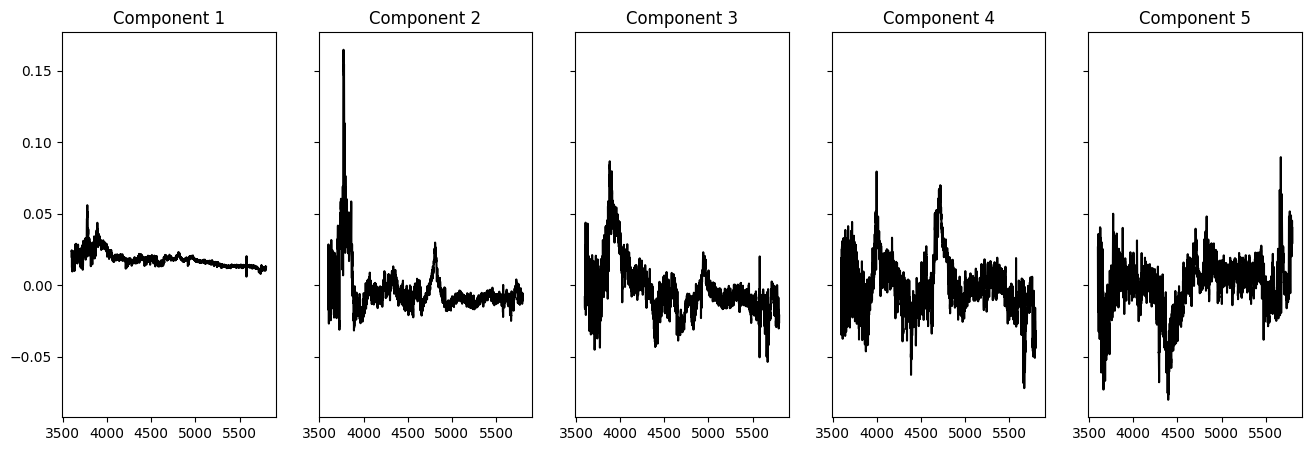

In [63]:
# Cargar los espectros de un archivo FITS
archivo_espectros = fits.open("/content/drive/MyDrive/ML2023/coadd-sv3-dark-25956.fits")
flujo_b = archivo_espectros["B_FLUX"].data  # Suponiendo que deseas realizar PCA en la banda "B"
wavelength = archivo_espectros["B_WAVELENGTH"].data
archivo_espectros.close()

# Realizar el análisis de componentes principales (PCA)
num_componentes = 5  # Número de componentes principales a calcular
pca = PCA(n_components=num_componentes)
pca.fit(flujo_b)

# Obtener los componentes principales
components = pca.components_

# Crear una figura con tres subgráficos para trazar los componentes principales
fig, axes = plt.subplots(nrows=1, ncols=num_componentes, figsize=(16, 5), sharey=True)

for i in range(num_componentes):
    axes[i].plot(wavelength, components[i], 'k')
    axes[i].set_title(f'Component {i+1}')

# Mostrar los gráficos
plt.show()

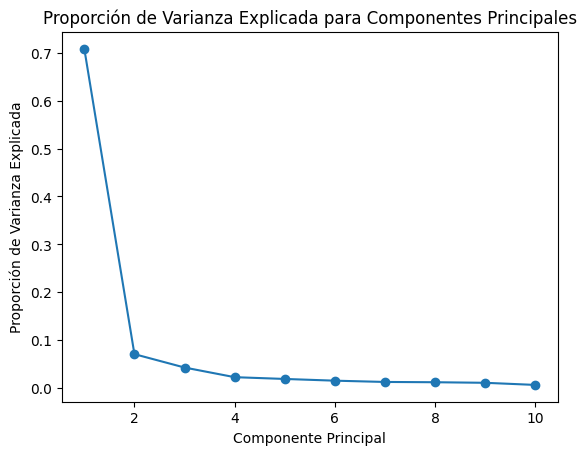

In [64]:
import numpy as np
from astropy.io import fits
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Cargar los espectros de un archivo
archivo_espectros = fits.open("/content/drive/MyDrive/ML2023/coadd-sv3-dark-25956.fits")
flujo_b = archivo_espectros["B_FLUX"].data  # Suponiendo que deseas realizar PCA en la banda "B"
archivo_espectros.close()

# Realizar PCA en los espectros
n_componentes = 10  # Número de componentes principales a retener (puedes cambiar esto)
pca = PCA(n_components=n_componentes)
componentes_principales = pca.fit_transform(flujo_b)

# Graficar la proporción de varianza explicada
proporcion_varianza_explicada = pca.explained_variance_ratio_
plt.plot(np.arange(1, n_componentes + 1), proporcion_varianza_explicada, marker='o')
plt.xlabel('Componente Principal')
plt.ylabel('Proporción de Varianza Explicada')
plt.title('Proporción de Varianza Explicada para Componentes Principales')
plt.show()

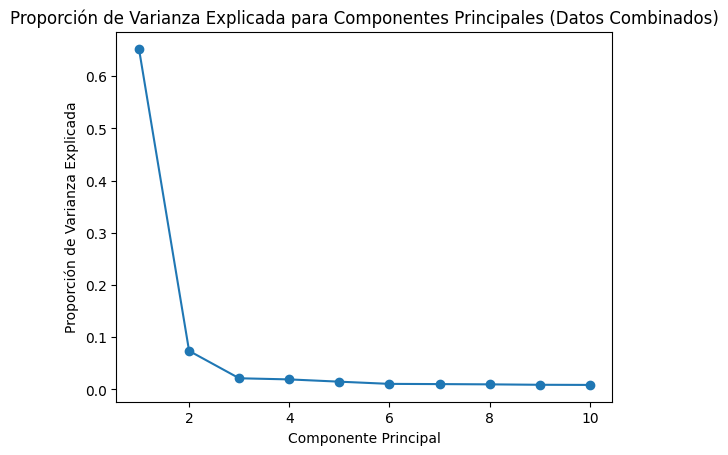

In [65]:
# Lista de archivos FITS para combinar
rutas_archivos = ["/content/drive/MyDrive/ML2023/coadd-sv3-dark-25971.fits", "/content/drive/MyDrive/ML2023/coadd-sv3-dark-9930.fits"]

# Cargar y apilar espectros de varios archivos
flujo_combinado_b = np.vstack([fits.open(archivo)["B_FLUX"].data for archivo in rutas_archivos])

# Realizar PCA en los espectros combinados
n_componentes = 10  # Número de componentes principales a retener
pca = PCA(n_components=n_componentes)
componentes_principales_combinados = pca.fit_transform(flujo_combinado_b)

# Graficar la proporción de varianza explicada
proporcion_varianza_explicada_combinada = pca.explained_variance_ratio_
plt.plot(np.arange(1, n_componentes + 1), proporcion_varianza_explicada_combinada, marker='o')
plt.xlabel('Componente Principal')
plt.ylabel('Proporción de Varianza Explicada')
plt.title('Proporción de Varianza Explicada para Componentes Principales (Datos Combinados)')
plt.show()

## Parte 2:

In [66]:
# In principle all these spectra corresponds to quasar spectra and redshift above 1.8,
# however we need to read one more table to know the redshift that DESI measured for each of the objects we have.

#In this case we will read the redshift catalog as a table directly.
zcat=Table.read("/content/drive/MyDrive/ML2023/zall-pix-edr-vac.fits",hdu=1)
#Display the redshift catalog.
zcat

TARGETID,SURVEY,PROGRAM,HEALPIX,SPGRPVAL,Z,ZERR,ZWARN,CHI2,COEFF,NPIXELS,SPECTYPE,SUBTYPE,NCOEFF,DELTACHI2,COADD_FIBERSTATUS,TARGET_RA,TARGET_DEC,PMRA,PMDEC,REF_EPOCH,FA_TARGET,FA_TYPE,OBJTYPE,SUBPRIORITY,OBSCONDITIONS,RELEASE,BRICKNAME,BRICKID,BRICK_OBJID,MORPHTYPE,EBV,FLUX_G,FLUX_R,FLUX_Z,FLUX_W1,FLUX_W2,FLUX_IVAR_G,FLUX_IVAR_R,FLUX_IVAR_Z,FLUX_IVAR_W1,FLUX_IVAR_W2,FIBERFLUX_G,FIBERFLUX_R,FIBERFLUX_Z,FIBERTOTFLUX_G,FIBERTOTFLUX_R,FIBERTOTFLUX_Z,MASKBITS,SERSIC,SHAPE_R,SHAPE_E1,SHAPE_E2,REF_ID,REF_CAT,GAIA_PHOT_G_MEAN_MAG,GAIA_PHOT_BP_MEAN_MAG,GAIA_PHOT_RP_MEAN_MAG,PARALLAX,PHOTSYS,PRIORITY_INIT,NUMOBS_INIT,CMX_TARGET,DESI_TARGET,BGS_TARGET,MWS_TARGET,SCND_TARGET,SV1_DESI_TARGET,SV1_BGS_TARGET,SV1_MWS_TARGET,SV1_SCND_TARGET,SV2_DESI_TARGET,SV2_BGS_TARGET,SV2_MWS_TARGET,SV2_SCND_TARGET,SV3_DESI_TARGET,SV3_BGS_TARGET,SV3_MWS_TARGET,SV3_SCND_TARGET,PLATE_RA,PLATE_DEC,COADD_NUMEXP,COADD_EXPTIME,COADD_NUMNIGHT,COADD_NUMTILE,MEAN_DELTA_X,RMS_DELTA_X,MEAN_DELTA_Y,RMS_DELTA_Y,MEAN_FIBER_RA,STD_FIBER_RA,MEAN_FIBER_DEC,STD_FIBER_DEC,MEAN_PSF_TO_FIBER_SPECFLUX,TSNR2_GPBDARK_B,TSNR2_ELG_B,TSNR2_GPBBRIGHT_B,TSNR2_LYA_B,TSNR2_BGS_B,TSNR2_GPBBACKUP_B,TSNR2_QSO_B,TSNR2_LRG_B,TSNR2_GPBDARK_R,TSNR2_ELG_R,TSNR2_GPBBRIGHT_R,TSNR2_LYA_R,TSNR2_BGS_R,TSNR2_GPBBACKUP_R,TSNR2_QSO_R,TSNR2_LRG_R,TSNR2_GPBDARK_Z,TSNR2_ELG_Z,TSNR2_GPBBRIGHT_Z,TSNR2_LYA_Z,TSNR2_BGS_Z,TSNR2_GPBBACKUP_Z,TSNR2_QSO_Z,TSNR2_LRG_Z,TSNR2_GPBDARK,TSNR2_ELG,TSNR2_GPBBRIGHT,TSNR2_LYA,TSNR2_BGS,TSNR2_GPBBACKUP,TSNR2_QSO,TSNR2_LRG,SV_NSPEC,SV_PRIMARY,ZCAT_NSPEC,ZCAT_PRIMARY,MIN_MJD,MEAN_MJD,MAX_MJD,FIRSTNIGHT,LASTNIGHT
int64,bytes7,bytes6,int32,int32,float64,float64,int64,float64,float64[10],int64,bytes6,bytes20,int64,float64,int32,float64,float64,float32,float32,float32,int64,uint8,bytes3,float64,int32,int16,bytes8,int32,int32,bytes4,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,float32,float32,float32,float32,int64,bytes2,float32,float32,float32,float32,bytes1,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,float64,float64,int16,float32,int16,int16,float32,float32,float32,float32,float64,float32,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int32,bool,int64,bool,float64,float64,float64,int32,int32
39628473198708395,cmx,other,2154,2154,-0.0019956912923479522,4.1311493573349107e-48,1570,8.999999999999996e+99,0.0 .. 0.0,0,STAR,CV,3,1.942668892225729e+84,512,23.661967677367254,29.84758879289675,0.0,0.0,2020.9597,9007199254742016,1,TGT,0.3743222091683128,7,9010,--,494512,1707,DEV,0.056008916,0.8742358,4.4879527,14.53286,40.183647,23.470558,846.09424,161.24467,27.071745,-1.0,-1.0,0.30432662,1.5622828,5.0589743,0.30432662,1.5622828,5.0589743,0,4.0,1.4857041,-0.47312373,0.34610084,0,--,0.0,0.0,0.0,0.0,S,3200,1,9007199254742016,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,23.661967677367254,29.84758879289675,0,0.0,0,0,0.0,0.0,0.0,0.0,23.6619676773673,0.0,29.8475887928968,0.0,0.7702122,334.5758,0.23833227,63.154266,251.84634,1200.8414,489.7509,6.6365247,1.7938427,29931.836,67.48044,5253.2964,0.107736714,5998.398,33749.49,20.86845,95.85028,4.4280867e-05,226.88919,8.178434e-06,0.0,9751.99,5.995135e-05,48.05161,102.743744,30266.412,294.60797,5316.4507,251.95409,16951.23,34239.24,75.55658,200.38788,0,False,1,True,59200.06640136,59200.095110124996,59200.12381137,20201216,20201216
39628473198709499,cmx,other,2154,2154,0.797663336968385,6.764807540963103e-05,0,8562.711500316858,173.84545793773444 .. 3.5471443000513863,7928,GALAXY,--,10,1111.0357974395156,0,23.711764237454403,29.843726508418328,0.0,0.0,2020.9597,9007199254742016,1,TGT,0.6556303597015493,7,9010,--,494512,2811,DEV,0.055015083,0.37260255,2.0997107,11.454535,42

In [67]:
#From the zcat table, the most important thing we will use is the TARGETID, the SURVEY, the SPECTYPE and the redshift Z.
#Lets reduce the table to just these variables.
zcat=zcat['TARGETID','SURVEY','SPECTYPE','Z']
zcat

TARGETID,SURVEY,SPECTYPE,Z
int64,bytes7,bytes6,float64
39628473198708395,cmx,STAR,-0.0019956912923479522
39628473198709499,cmx,GALAXY,0.797663336968385
39628473198710139,cmx,GALAXY,1.33150513847107
39628473198710603,cmx,GALAXY,0.804205874112604
39628473198711006,cmx,STAR,-6.607473910190775e-05
39628473198711342,cmx,STAR,-0.0019956912923479522
39628473198711925,cmx,GALAXY,0.39072440164450306
39628473202901028,cmx,GALAXY,0.6657999257489294
39628473202901626,cmx,GALAXY,0.32842015807005115


In [68]:
#Now lets reduce the table to contain only the elements for which the TARGETIDs that we identified in our spectra file are present
#For this we need to know that such files correspond to the SURVEY=sv3 (as indicated in the filename)
#So, lets make first a filter for sv3
mask=zcat["SURVEY"]=='sv3'
zcat=zcat[mask]
zcat

TARGETID,SURVEY,SPECTYPE,Z
int64,bytes7,bytes6,float64
616088497761027054,sv3,GALAXY,0.8047145429076951
616088497765221242,sv3,STAR,-0.0019956912923479522
616088497765221281,sv3,GALAXY,0.5507557262875663
616088497765221450,sv3,GALAXY,0.07358486749516376
616088497765221501,sv3,GALAXY,0.719444701817346
616088497769415698,sv3,GALAXY,0.039215908005138314
616088497773610181,sv3,GALAXY,0.2864062436603106
616088497819747217,sv3,GALAXY,0.4960341488452893
616088497819747383,sv3,GALAXY,1.0968576187793935


In [69]:
#Now lets keep only the elements corresponding to the TARGETIDS we have in the spectrafile
mask=np.in1d(zcat["TARGETID"],tids)
zcat=zcat[mask]
zcat

TARGETID,SURVEY,SPECTYPE,Z
int64,bytes7,bytes6,float64
39627764218727224,sv3,QSO,2.1370347911252843
39627764222919195,sv3,QSO,2.5460148518383536
39627764222919677,sv3,QSO,2.5116209374418137
39627764222921791,sv3,QSO,2.1421198094951523
39627764222924517,sv3,QSO,2.2851727866116023
39627764227118438,sv3,QSO,3.630129643577127
39627764227118638,sv3,QSO,2.540430344832981
39627770258523079,sv3,QSO,1.5479191017583473
39627770258526411,sv3,QSO,2.470417839489763


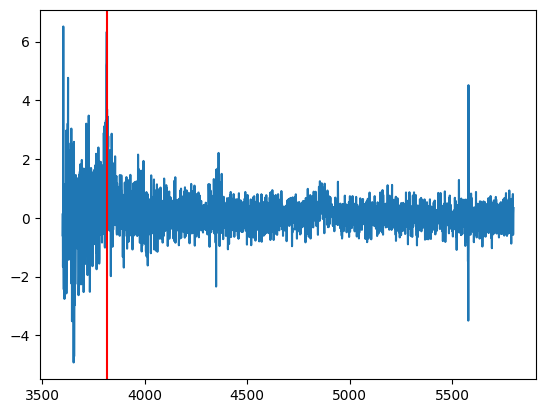

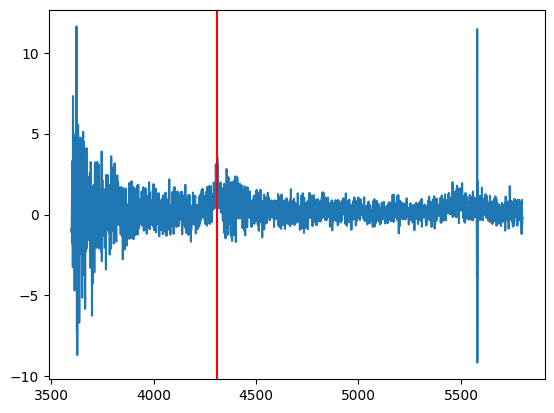

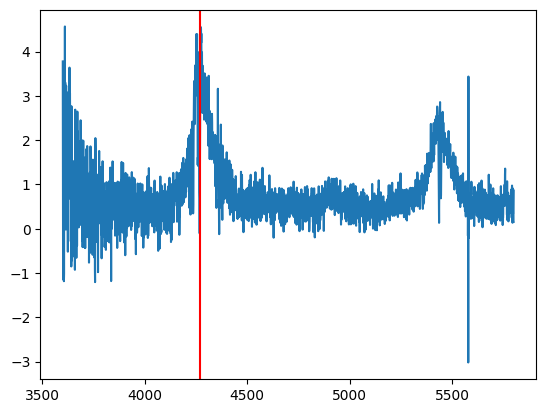

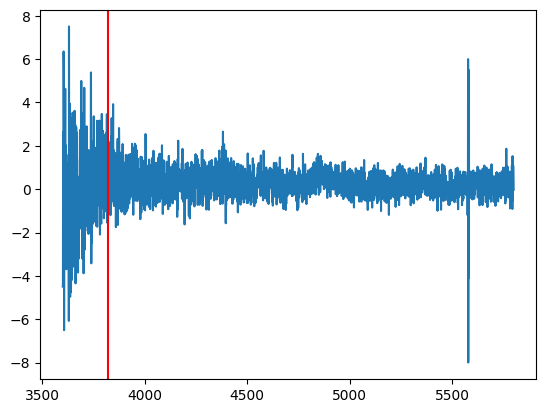

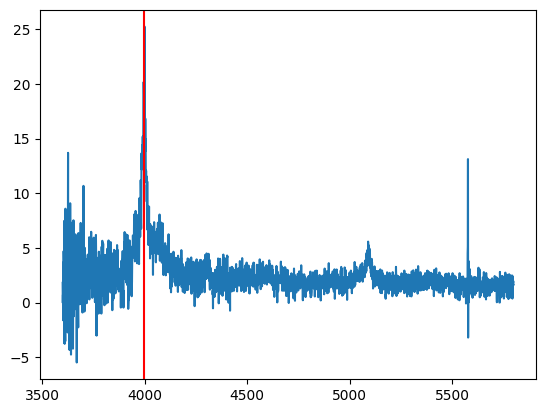

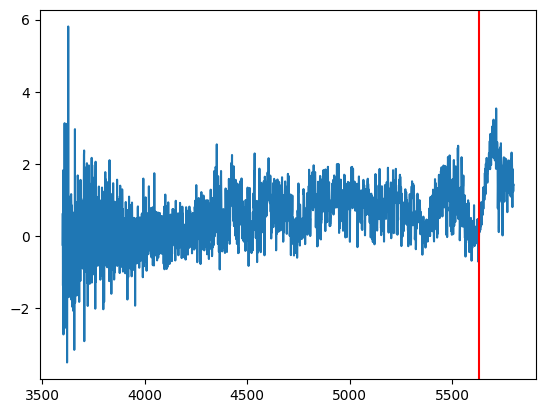

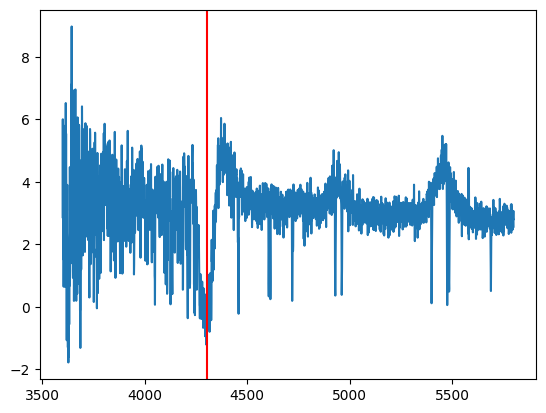

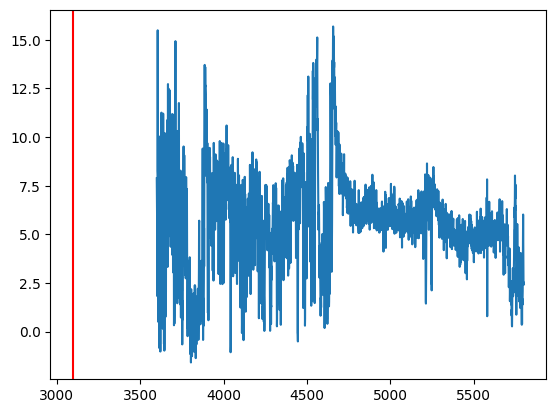

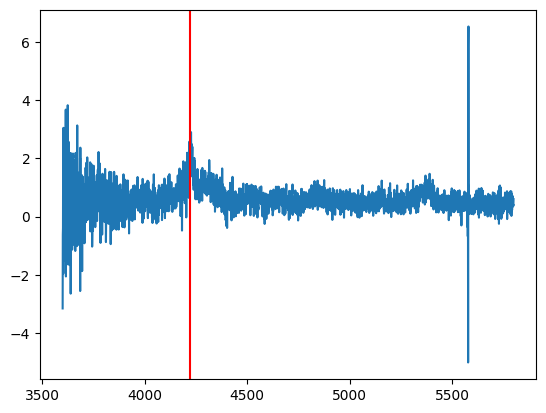

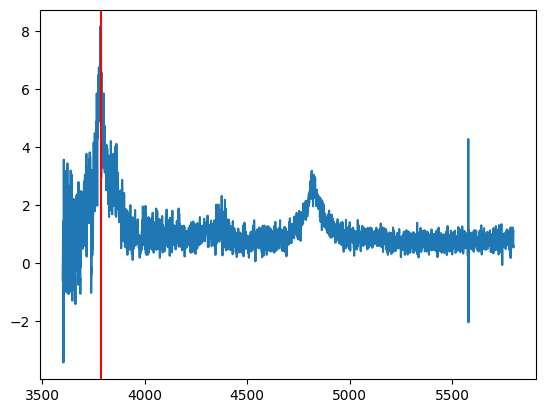

In [70]:
#As we can see we have now a table with only 49 elements, and most of the spectype is of the QSO kind.
#So now we now for a given TARGETID what is the corresponding redshift of the Quasar
# Now lets see if there is agrrement, by ploting the possition of the Lyman-alpha emission
# line for the first 10 elements in the catalog

lya=1216

for i,tid in enumerate(zcat["TARGETID"][:10]):
  z=zcat["Z"][i]
  indx=np.where(tids==tid)[0][0]
  plt.plot(bwave,bflux[indx])
  plt.axvline(1216*(1+z),color='r')
  plt.show()

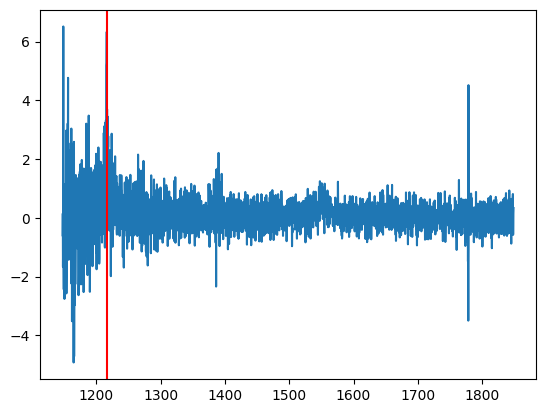

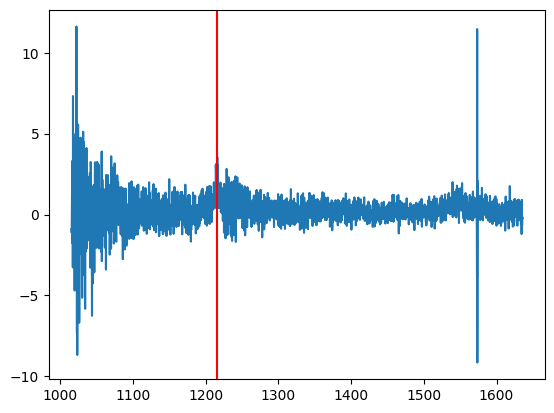

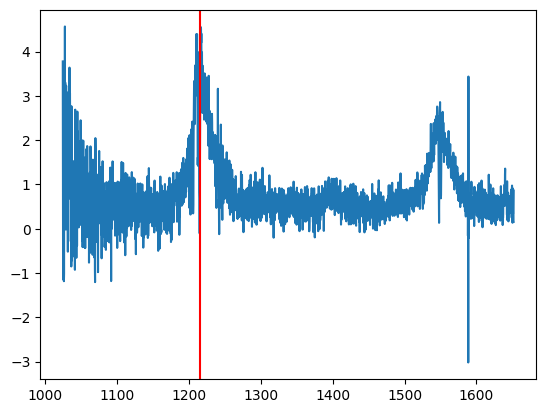

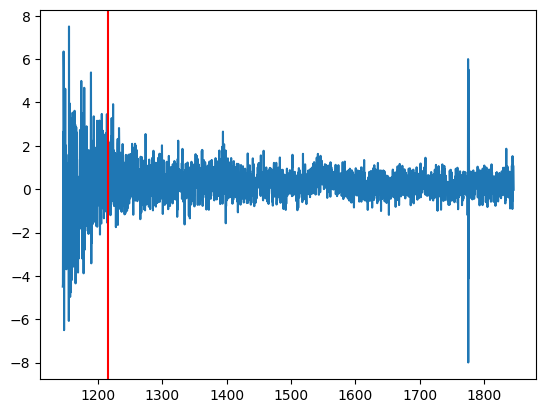

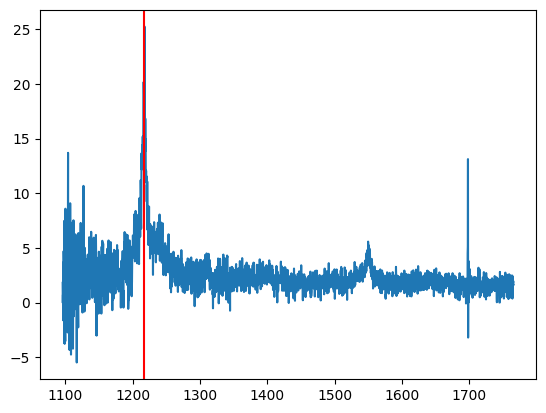

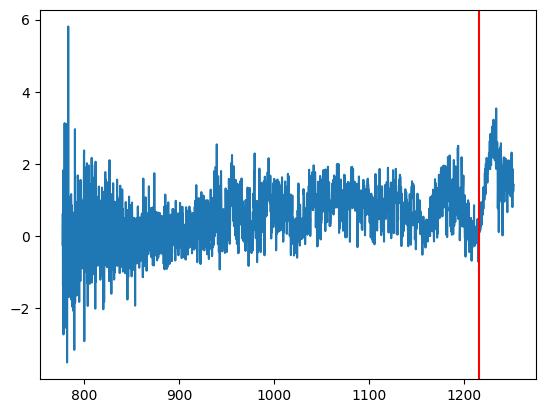

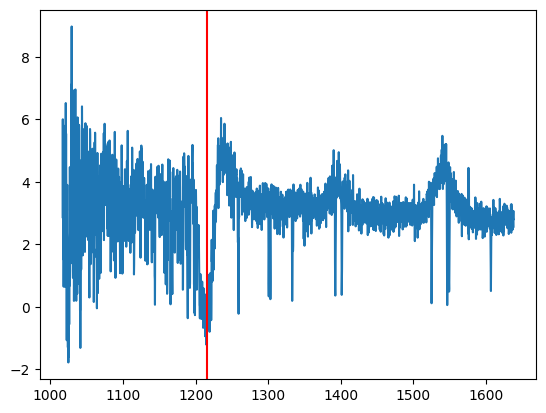

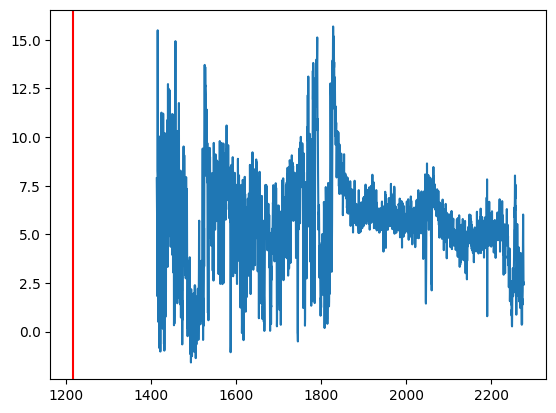

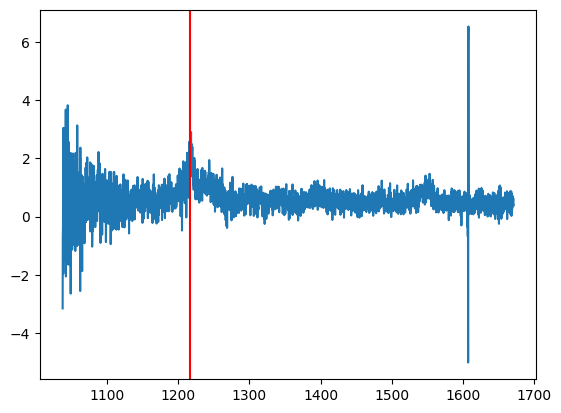

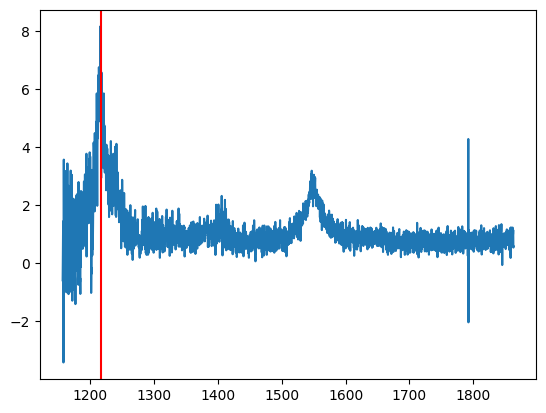

In [71]:
#We can see in most of the cases the position of the redline, which is the expected position of the Lya emission line
#match very well with the position of a strong emission line in the data. So we are confident that we are matching correctly
#the spectra with the quasar redshift.
#Now we can convert our spectra from the observed frame to restframe, to do so we need to convert the wavelentgh array
#for each of the spectra to the observed frame using the redhisft.
#Again, here is an example for the first ten spectra

lya=1216

for i,tid in enumerate(zcat["TARGETID"][:10]):
  z=zcat["Z"][i]
  indx=np.where(tids==tid)[0][0]
  plt.plot(bwave/(1+z),bflux[indx])
  plt.axvline(1216,color='red')
  plt.show()

NOTAS:

Se está leyendo un catálogo de corrimientos al rojo desde un archivo FITS usando la función Table.read y mostrando su contenido.
Se está extrayendo columnas específicas (TARGETID, SURVEY, SPECTYPE, Z) del catálogo de corrimientos al rojo para crear una nueva tabla llamada zcat.
Filtras la tabla zcat para incluir solo los datos con SURVEY igual a 'sv3'.

Luego, filtras la tabla zcat para incluir solo los datos cuyos TARGETID coinciden con la lista de identificadores de objetivo (tids) de tu archivo de espectros.
Se tiene una tabla con 49 elementos, y la mayoría de los tipos de espectro son del tipo QSO, lo que indica que tienes espectros de cuásares con sus correspondientes corrimientos al rojo.

Se traza la línea de emisión del Lyman-alfa (Lya) para los primeros 10 elementos en el catálogo. La línea de emisión de Lya se posiciona en 1216 Å en el marco en reposo y Se traza en el marco observado teniendo en cuenta el corrimiento al rojo.

Demostrando que en la mayoría de los casos, la línea roja (posición esperada de la línea de emisión Lya) coincide bien con una línea de emisión fuerte en los datos, lo que confirma la correcta correspondencia entre los espectros y los corrimientos al rojo de los cuásares.
S e está trazando los primeros diez espectros después de convertirlos del marco observado al marco en reposo utilizando sus respectivos corrimientos al rojo. Esto implica desplazar la matriz de longitudes de onda dividiéndola por (1+z) para tener en cuenta el corrimiento al rojo.

## Excersise:
Now that you can convert the spectra to the rest frame,
create a wavelength array in the rest frame that is common for all the spectra, and interpolate de spectra in such array. So that all your spectra have the same wavelenght array as before and you can apply now the PCA analysis.

In [77]:
from scipy import interpolate

# Define el rango de longitudes de onda en el marco en reposo basado en los corrimientos al rojo mínimo y máximo
corrimiento_al_rojo_min = np.min(zcat["Z"])
corrimiento_al_rojo_max = np.max(zcat["Z"])
longitud_onda_min = bwave[0] / (1 + corrimiento_al_rojo_max)  # Convertir al marco en reposo
longitud_onda_max = bwave[-1] / (1 + corrimiento_al_rojo_min)  # Convertir al marco en reposo

# Crea un array de longitudes de onda en el marco en reposo común
longitud_onda_marco_reposo = np.linspace(longitud_onda_min, longitud_onda_max, num=1000)

# Inicializa un array para almacenar los espectros interpolados
espectros_interpolados = []

# Interpola cada espectro en el nuevo array de longitudes de onda en el marco en reposo
for i, tid in enumerate(zcat["TARGETID"]):
    z = zcat["Z"][i]
    indx = np.where(tids == tid)[0][0]
    longitud_onda_observada = bwave / (1 + z)  # Convierte la longitud de onda observada al marco en reposo
    f = interpolate.interp1d(longitud_onda_observada, bflux[indx], kind='linear', fill_value="extrapolate")
    espectro_interpolado = f(longitud_onda_marco_reposo)
    espectros_interpolados.append(espectro_interpolado)

# Convierte la lista de espectros interpolados a un array NumPy
espectros_interpolados = np.array(espectros_interpolados)
espectros_interpolados

array([[ -1253.53084433,  -1240.11565166,  -1226.70045898, ...,
          2596.00677001,   2599.46084597,   2602.91492193],
       [   286.24852814,    281.80942833,    277.37032852, ...,
         -1416.90143769,  -1418.67730032,  -1420.45316296],
       [  2721.5352617 ,   2680.87682614,   2640.21839058, ...,
          -294.88279112,   -295.2542518 ,   -295.62571248],
       ...,
       [  2848.02815783,   2795.66983424,   2743.31151065, ...,
        -13849.52205757, -13866.52725305, -13883.53244852],
       [  2533.11509383,   2499.7605815 ,   2466.40606918, ...,
           264.89937965,    265.23860202,    265.5778244 ],
       [ -9002.83446728,  -8887.06468795,  -8771.29490862, ...,
        -32167.11832388, -32208.52868694, -32249.93904999]])

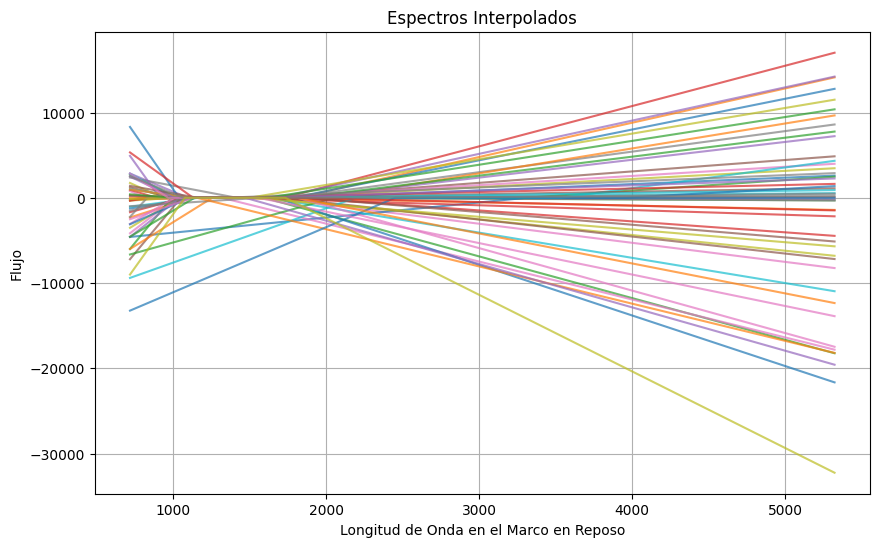

In [79]:
plt.figure(figsize=(10, 6))
for espectro in espectros_interpolados:
    plt.plot(longitud_onda_marco_reposo, espectro, alpha=0.7)

plt.xlabel('Longitud de Onda en el Marco en Reposo')
plt.ylabel('Flujo')
plt.title('Espectros Interpolados')
plt.grid(True)
plt.show()

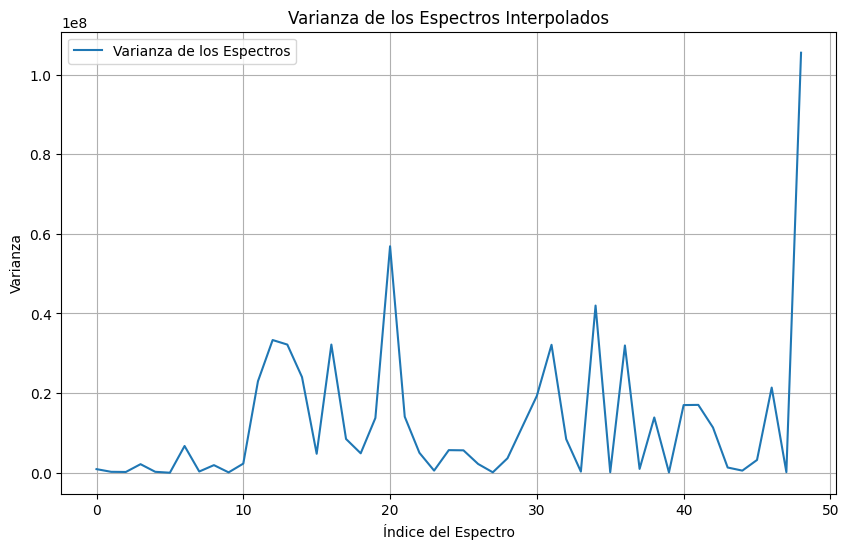

In [80]:
# Calcula la varianza de los espectros interpolados
varianza_espectros = np.var(espectros_interpolados, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(varianza_espectros, label='Varianza de los Espectros')
plt.xlabel('Índice del Espectro')
plt.ylabel('Varianza')
plt.title('Varianza de los Espectros Interpolados')
plt.grid(True)
plt.legend()
plt.show()